In [1]:
from nn_utils import train_x, train_y, plot_decision_boundary, plot_loss
import numpy as np
from turabnet.train import train
from turabnet.nn import NeuralNet
from turabnet.layers import Linear, Tanh
from turabnet.data import BatchIterator
from turabnet.loss import Softmax_cross_entropy_with_logits
from turabnet.optim import SGD
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Train the model
training with a very simple model with minimum number of neurons. As moon dataset is not linearly seperable, we use a non-linear model.

In [2]:
net = NeuralNet([
    Linear(input_size=2, output_size=2),
    Tanh(),
    Linear(input_size=2, output_size=2)
])

_losses = train(net=net,
               inputs=train_x, targets=train_y,
               num_epochs=100, iterator=BatchIterator(batch_size=32, shuffle=True),
               loss=Softmax_cross_entropy_with_logits(),
               optimizer=SGD(lr=0.5),
               verbose=True, print_every=20)
# Testing
_predictions = net.forward(train_x)
print(f"train_x: {train_x.shape} train_y: {train_y.shape} y_perd: {_predictions.shape} ")
print("Test Accuracy: " + str(np.sum((np.argmax(_predictions, axis=1) == train_y))/train_y.shape[0]))

epoch:   1 loss: 2.668
epoch:  20 loss: 0.666
epoch:  40 loss: 0.608
epoch:  60 loss: 0.556
epoch:  80 loss: 0.516
epoch: 100 loss: 0.514
train_x: (50, 2) train_y: (50,) y_perd: (50, 2) 
Test Accuracy: 0.96


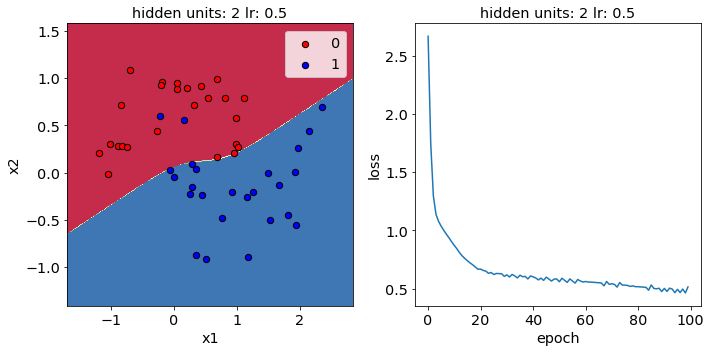

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plot_decision_boundary(train_x, train_y, lambda x: np.argmax(net.forward(x), axis=1))
plt.title(f"hidden units: {2} lr: {0.5}")

plt.subplot(1,2,2)
plot_loss(_losses)
plt.title(f"hidden units: {2} lr: {0.5}")

plt.tight_layout()
plt.show()

### Try different learning rate and hidden units

In [4]:
lr = [0.005, 0.05, 0.5]
h = [2, 3]
cache = []
for _lr in lr:
    for _h in h:
        _net = NeuralNet([
        Linear(input_size=2, output_size=_h),
        Tanh(),
        Linear(input_size=_h, output_size=2)
        ])

        _losses = train(net=_net,
                       inputs=train_x, targets=train_y,
                       num_epochs=100, iterator=BatchIterator(batch_size=32, shuffle=True),
                       loss=Softmax_cross_entropy_with_logits(),
                       optimizer=SGD(lr=_lr),
                       verbose=False, print_every=20)
        cache.append((_net, _losses,_h, _lr))
print("end of training")

end of training


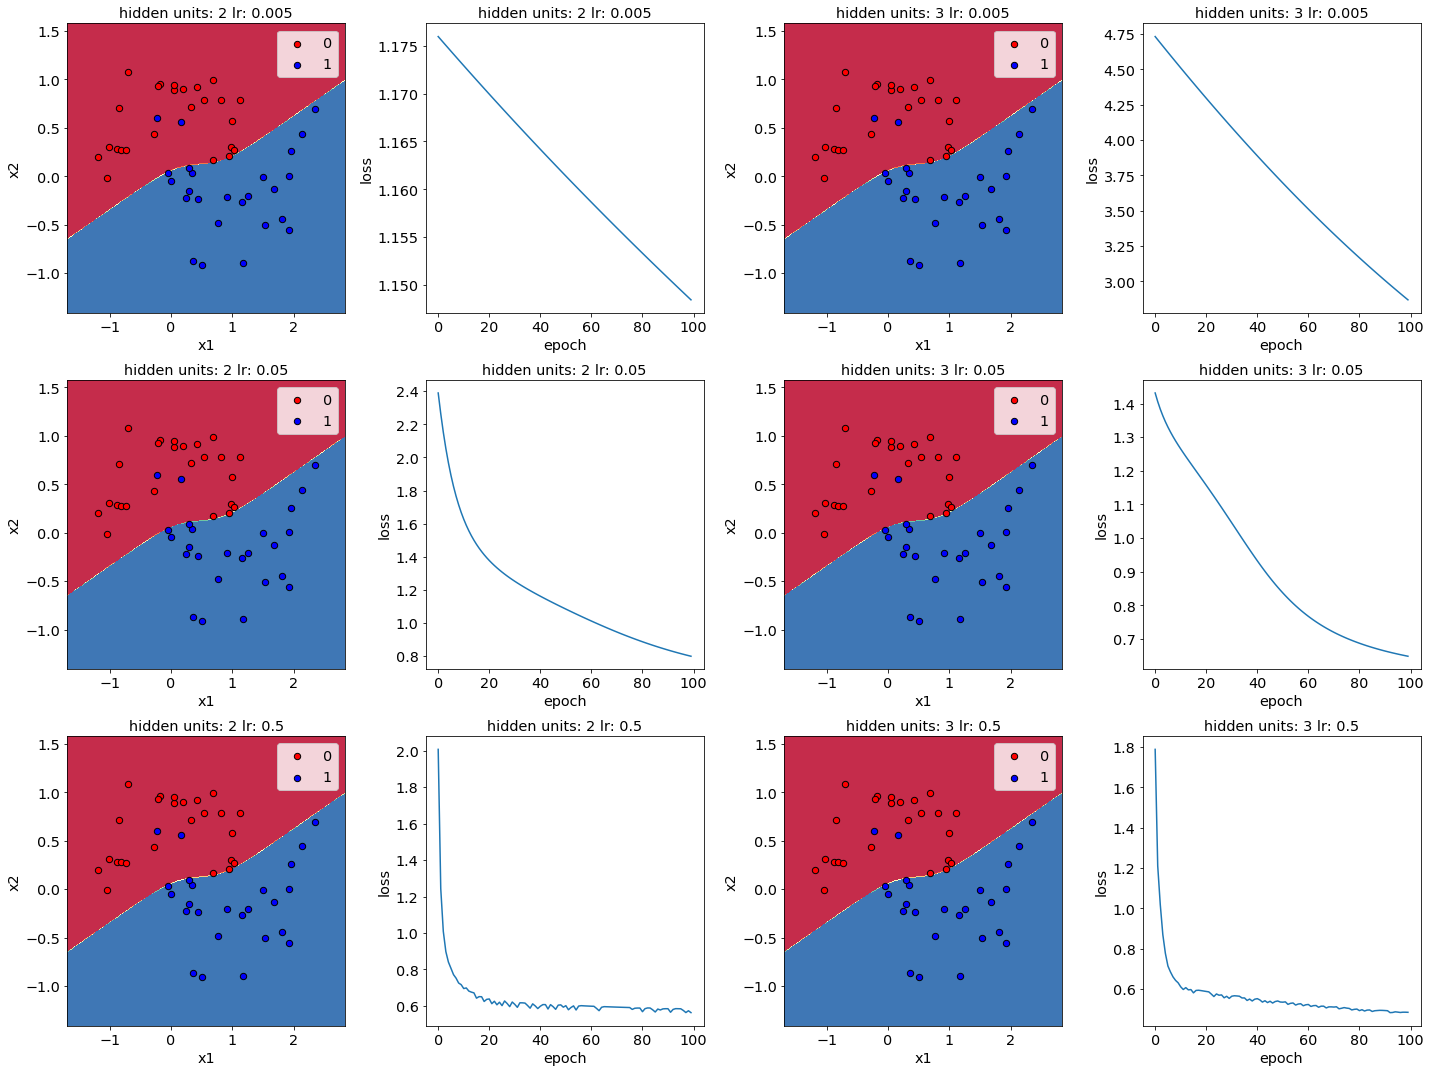

In [5]:
plt.figure(figsize=(20, 15))
for i, (_net, _losses,_h, _lr) in enumerate(cache):
    
    plt.subplot(3,4,2*i+1)
    plot_decision_boundary(train_x, train_y, lambda x: np.argmax(net.forward(x), axis=1))
    plt.title(f"hidden units: {_h} lr: {_lr}")
    
    plt.subplot(3, 4, 2*i+ 2)
    plot_loss(_losses)
    plt.title(f"hidden units: {_h} lr: {_lr}")

plt.tight_layout()
plt.show()

### Summary:
- moon outputs are not linearly separable. hence we need multiple non-linear layers to model it.
- we do not use activation function in the last layer since we are using Softmax_cross_entropy_with_logits loss function
  which uses softmax activation function.
- we can see the performance at different learning rate and hidden units. Loss function converges faster at higher learing rate. The model can learn more complex representations as hidden units increases
- as we used random weights to initialize the parameters, the output will differ at each run time